# Data and Libraries Loading

In [1]:
# Importing libraries that will be used

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

sample_submission.csv
test.csv
train.csv



In [7]:
# Data Loading 
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [8]:
# Display first few rows of train and test
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
# Getting to know columns of training set
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
# Saving the 'Id' column and removing it because it is a Unique Identifier for each row

# Save 'Id' column
train_ID = train['Id']
test_ID = test['Id']

train.drop('Id', axis= 1, inplace=True)
test.drop('Id', axis = 1, inplace=True)

print('train data has a shape of: {}'.format(train.shape))
print('test data has a shape of: {}'.format(test.shape))


train data has a shape of: (1460, 80)
test data has a shape of: (1459, 79)


# Data Preprocessing

## Checking for Outliers

### GrLivArea vs SalePrice

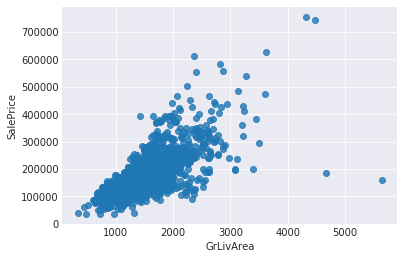

In [14]:
sns.regplot(x= train['GrLivArea'], y = train['SalePrice'], fit_reg=False)

There are clearly two outliers at the bottom right that will skew the data. Hence, it is safe to remove them. 

In [15]:
# Deleting the outliers seen above
train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.000,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.000,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [16]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

In [17]:
train.shape

(1458, 80)

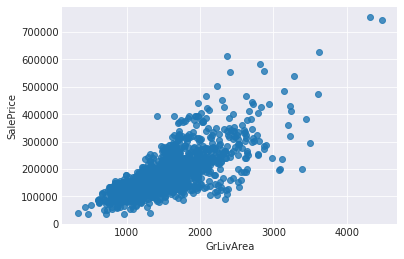

In [18]:
sns.regplot(x = train['GrLivArea'], y = train['SalePrice'], fit_reg=False)

# Target Variable Analysis - SalePrice

Text(0.5,1,'SalePrice Distribution')

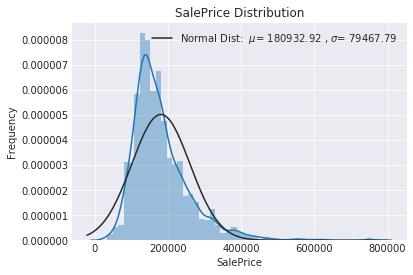

In [19]:
# Analyzing distribution of SalePrice

sns.distplot(train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])

plt.legend(['Normal Dist:  $\mu$= {:.2f} , $\sigma$= {:.2f}'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

Based on the distribution plot above, SalePrice is clearly **positively skewed** and seems to be lognormal distribution

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

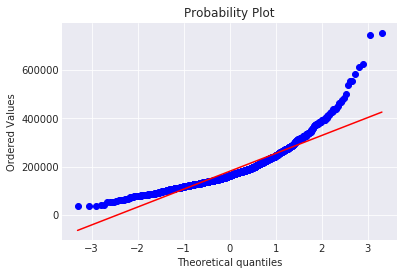

In [20]:
# QQ plot to confirm skewness

stats.probplot(train['SalePrice'], plot=plt)

Seems like it is positively skewed and would be better if we transform it as linear models perform better with normality and also get to reduce effects of large values 

## Log Transformation of SalePrice

In [21]:
# apply log(1+x) to all elements in SalePrice
train['SalePrice'] = np.log1p(train['SalePrice'])

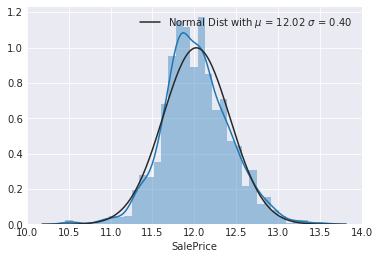

In [22]:
sns.distplot(train['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(train['SalePrice'])

plt.legend(['Normal Dist with $\mu$ = {:.2f} $\sigma$ = {:.2f}'.format(mu, sigma)])

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3985294832980731, 12.024015155682548, 0.9953918721417083))

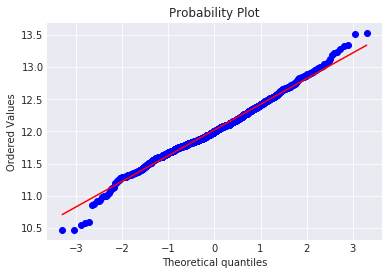

In [23]:
## QQ plot of log1p SalePrice

stats.probplot(train['SalePrice'], plot=plt)

Distribution now looks mostly normally distributed but with fat tails, which is considerably alright

# Feature Engineering

Before feature engineering, be sure to concatenate the train and test set so that the engineering is applied to both sets of data

In [24]:
train.shape

(1458, 80)

In [25]:
test.shape

(1459, 79)

In [26]:
train.shape[0] + test.shape[0]

2917

In [27]:
train.SalePrice.values

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [28]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

In [29]:
all_data = pd.concat([train, test]).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2917, 79)

## Missing Data

In [30]:
# Missingness ratio
all_data_na = (all_data.isnull().sum() / len(all_data))* 100

In [31]:
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:30]

In [32]:
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5,1,'Percent Missing Data by Feature')

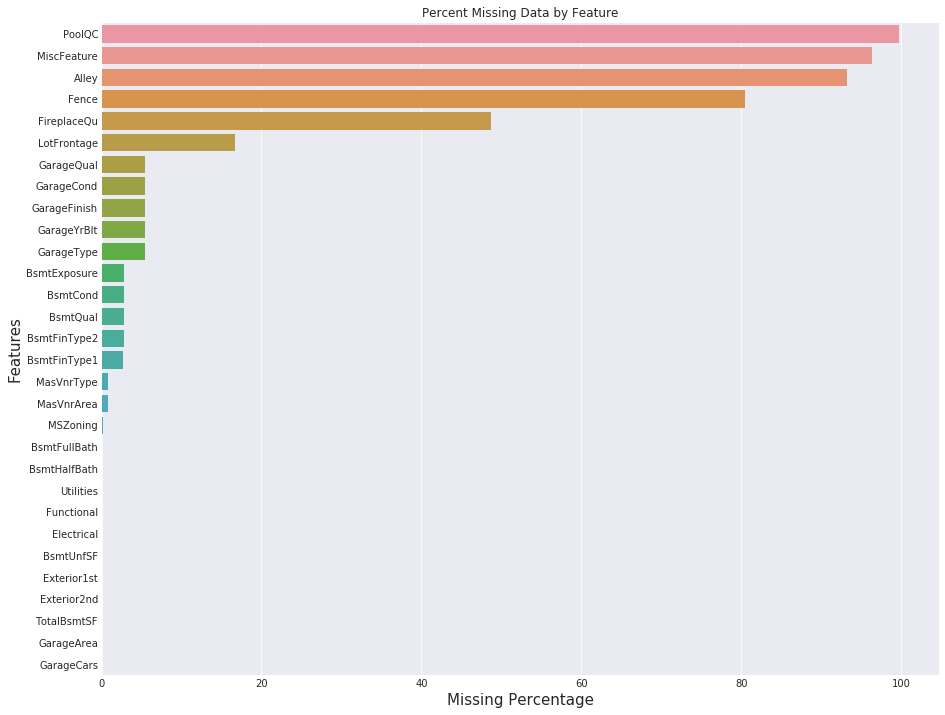

In [33]:
f, ax = plt.subplots(figsize = (15, 12))

sns.barplot(y = all_data_na.index, x = all_data_na)
plt.ylabel('Features', fontsize = 15)
plt.xlabel('Missing Percentage', fontsize = 15)
plt.title('Percent Missing Data by Feature')

## Correlation

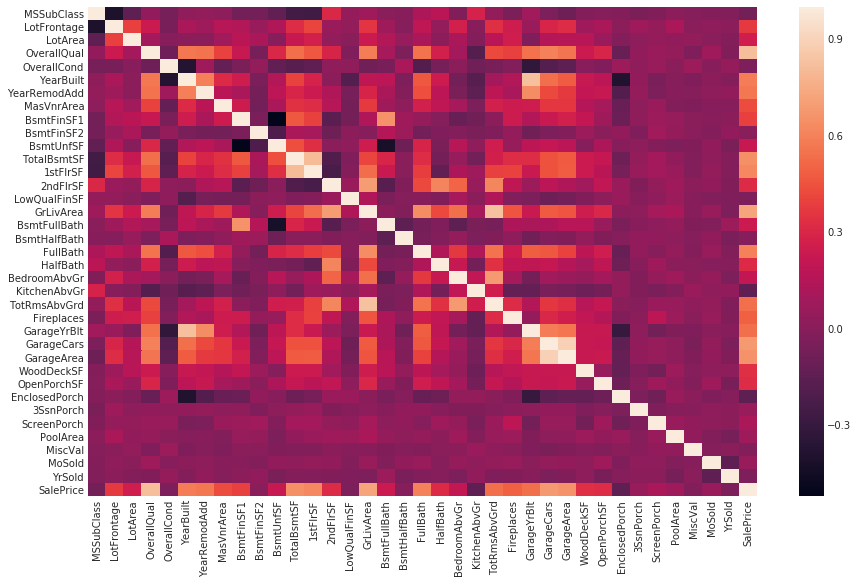

In [34]:
# Correlation map
cormat = train.corr()
plt.subplots(figsize=(15, 9))
sns.heatmap(cormat)

## Top 10 Correlated Features

In [35]:
pd.DataFrame({'SalePrice Correlation ':cormat['SalePrice'].sort_values(ascending = False)}).head(10)

,SalePrice Correlation
SalePrice,1.000
OverallQual,0.821
GrLivArea,0.725
GarageCars,0.681
GarageArea,0.656
TotalBsmtSF,0.648
1stFlrSF,0.621
FullBath,0.596
YearBuilt,0.587
YearRemodAdd,0.566


# Imputing Missing Values

In [36]:
# Recall the following:
missing_data

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


In [37]:
# From PoolQC to FirePlace we will fillna() with None

In [38]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

In [39]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [40]:
all_data.isnull().sum().sort_values(ascending = False)

LotFrontage      486
GarageCond       159
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
BsmtFinSF2         1
Electrical         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
SaleType           1
KitchenQual        1
FireplaceQu        0
                ... 
YearBuilt          0
WoodDeckSF         0
TotRmsAbvGrd       0
Street             0
ScreenPorch        0
SaleCondition      0
RoofStyle          0
RoofMatl           0
PoolQC             0
PoolArea           0
PavedDrive         0
OverallQual        0
OverallCond        0
OpenPorchSF        0
Neighborhood       0
MoSold             0
MiscVal      

In [41]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data['LotFrontage'] = all_data.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [42]:
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')

In [43]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [44]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data = all_data.drop(['Utilities'], axis=1)

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [45]:
# SaleType : Fill in again with most frequent which is "WD"

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [46]:
# Are there anymore missing values?
# Confirmed no missing values
sum(all_data.isnull().sum())

0

## More Feature Engineering

In [47]:
# Based on description.txt, it is rather a categorical variable
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [48]:
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

## Label Encoding Categorical Data

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


## One More Feature Engineering

In [51]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

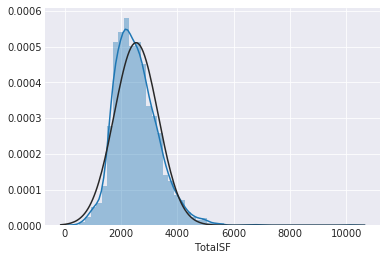

In [52]:
sns.distplot(all_data['TotalSF'], fit=norm)

# Plotting Distribution of Numerical Features before Transformationxxx

## Skewed Features

In [53]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew': skewed_feats})

In [54]:
# Next step: find different optimal lambdas to skew each numerical feature by
skew_var = skewness[abs(skewness.Skew) > 0.75]

print('There are {} skewed numerical features to be transformed'.format(skew_var.shape[0]))


There are 36 skewed numerical features to be transformed


## Plotting Distribution before Box Cox Transform

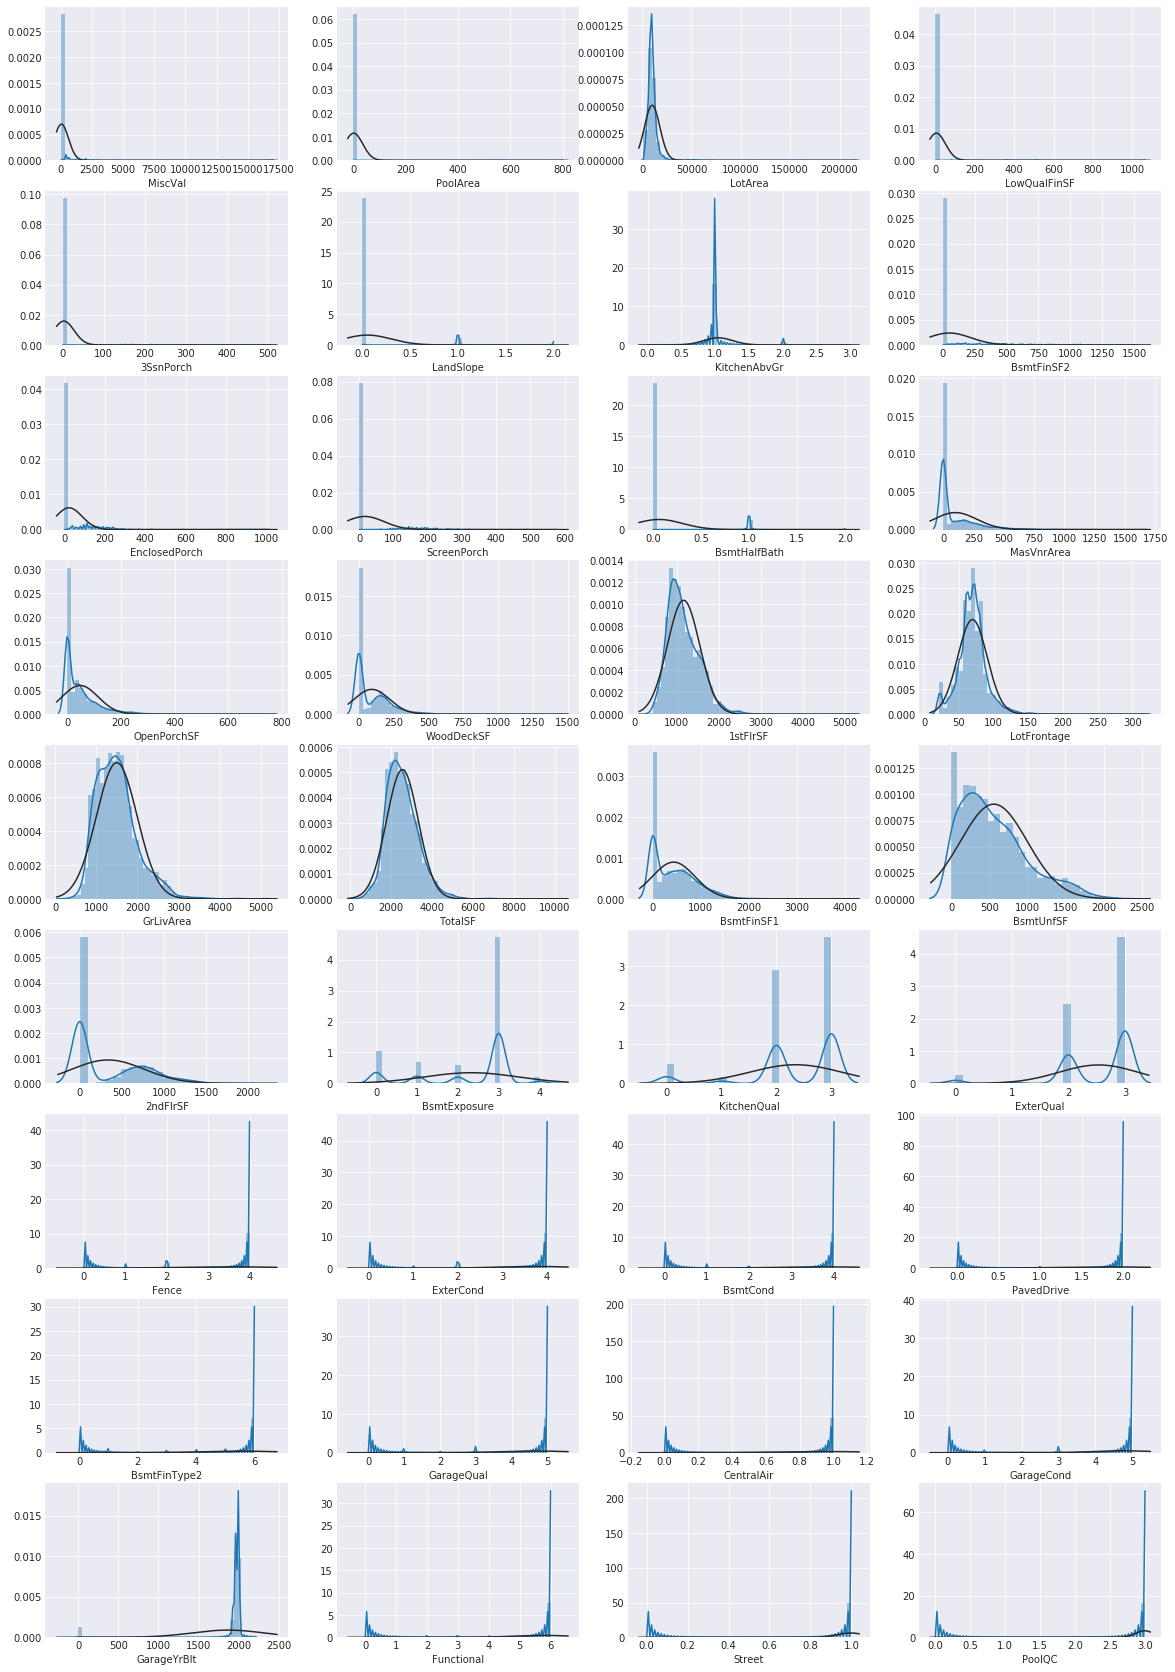

In [55]:
fig, ax = plt.subplots(9,4, figsize=(20,30))

for i, cols in enumerate(list(skew_var.index)):
    x = i // 4
    y = i % 4
    sns.distplot(all_data[cols], ax=ax[x,y], fit=norm)

### Box - Cox Transformation of Highly Skewed Features

Here we shall define highly skewed if  | $\lambda$ | > 0.75

Considering using different optimized lambda for different columns. Use scipy.boxcox to gather lambdas of each numerical feature.

In [56]:

from scipy.special import boxcox1p
skewed_features = skew_var.index
lam = 0.15

for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

## Plotting Distribution Post Transformation

Clearly there are some outliers present in most of these numerical features. Consider to remove them

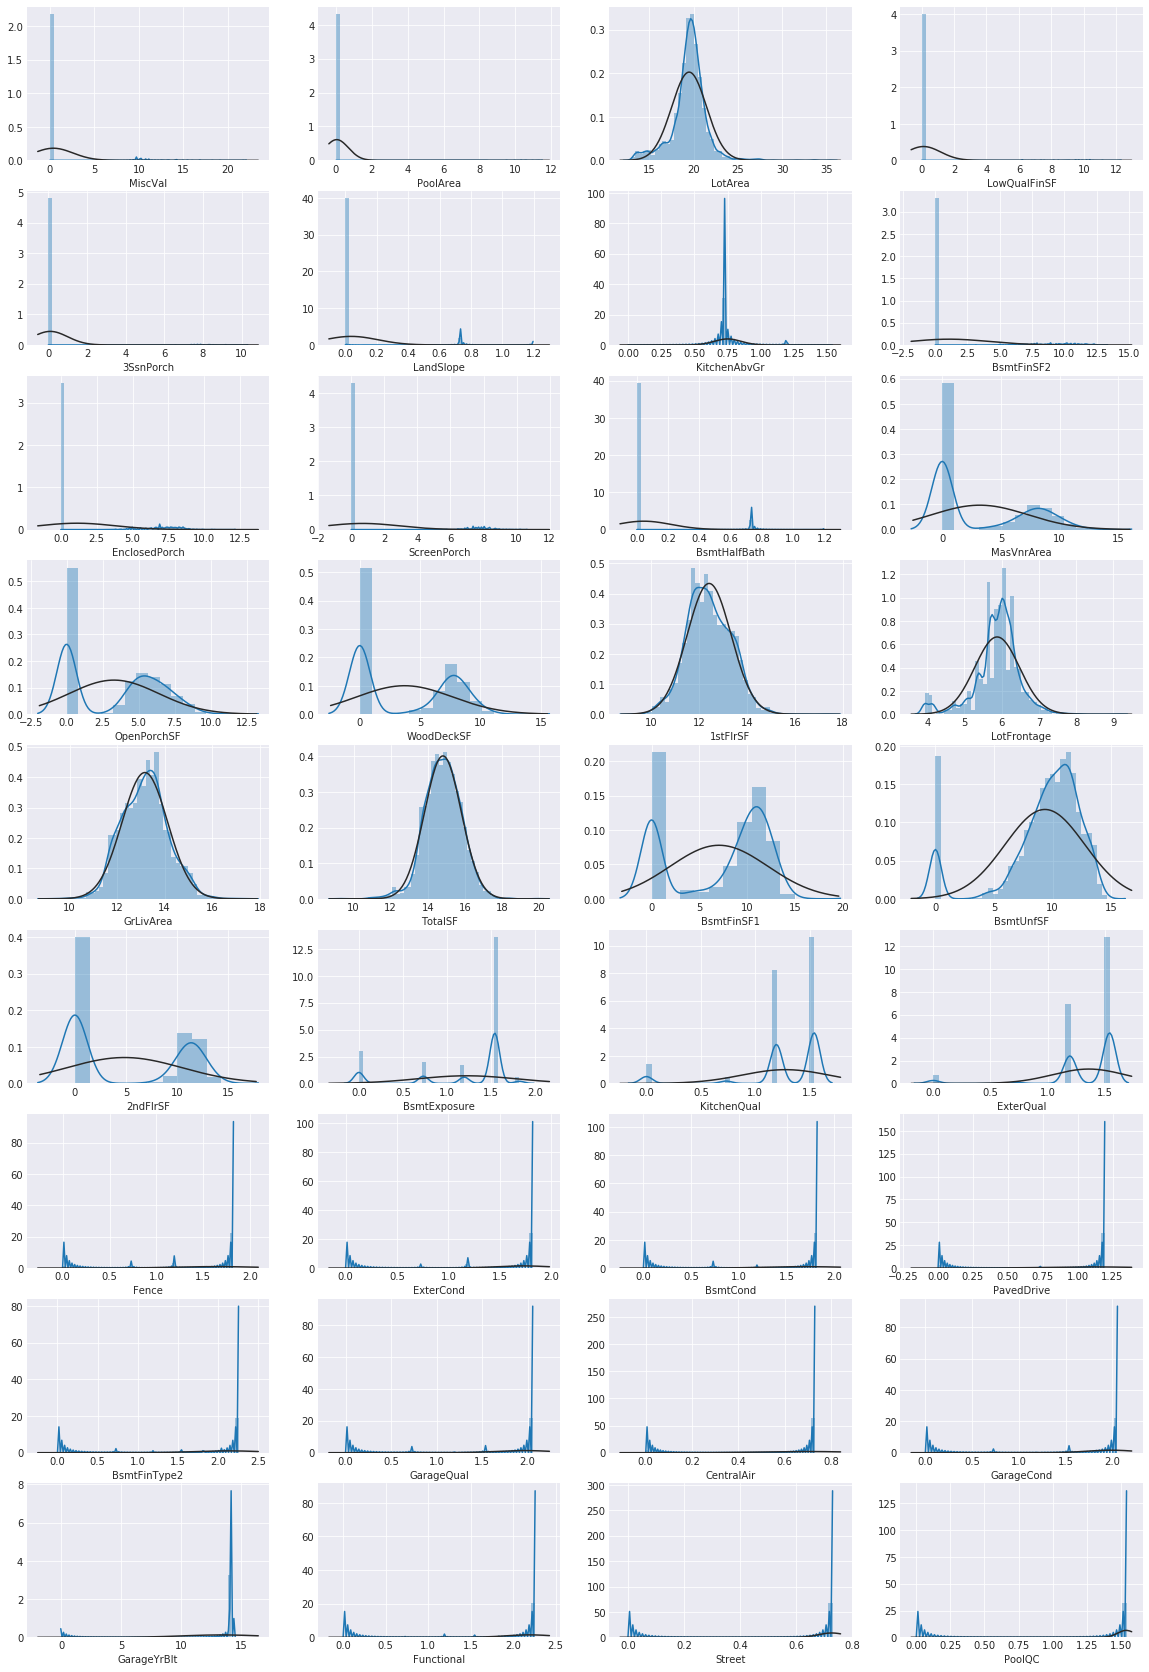

In [57]:
fig, ax = plt.subplots(9,4, figsize=(20,30))

for i, cols in enumerate(list(skew_var.index)):
    x = i // 4
    y = i % 4
    sns.distplot(all_data[cols], ax=ax[x,y], fit=norm)

## Getting Dummy Categorical Features

In [58]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [59]:
# Getting new train and test sets
train = all_data[:ntrain]
test = all_data[ntrain:]

# Modelling

In [60]:
# Importing Libraries

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [61]:
# Cross Validation function
# model here is the estimator
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## Base Models

Use of RobustScaler() for models that are sensitive to outliers such as Lasso and Elastic Net

In [62]:
# LASSO Regression

lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

In [63]:
lasso

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [64]:
# Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))

In [65]:
ENet

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False))])

In [66]:
# Kernel Ridge Regression
KRR = KernelRidge(alpha = 0.6, kernel='polynomial', degree=2, coef0=2.5)

In [67]:
KRR

KernelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)

In [68]:
# Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [69]:
# XGBoost

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [70]:
# Light GBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       learning_rate=0.05, max_bin=55, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_data_in_leaf=6, min_split_gain=0.0,
       min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
       num_leaves=5, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

## Base Model Scores

In [71]:
mod = ['lasso', 'ENet', 'KRR', 'GBoost', 'model_xgb', 'model_lgb']
for n, i in enumerate([lasso, ENet, KRR, GBoost, model_xgb, model_lgb]):
    score = rmsle_cv(i)
    print('Score of ' + mod[n] + ': {:.4f} ({:.4f})'.format(score.mean(), score.std()))

Score of lasso: 0.1113 (0.0075)
Score of ENet: 0.1114 (0.0076)
Score of KRR: 0.1848 (0.0206)
Score of GBoost: 0.1166 (0.0093)
Score of model_xgb: 0.1183 (0.0074)
Score of model_lgb: 0.1173 (0.0093)


## Stacking Models

### Averaging Base Models

Use **class** to extend scikit learn with model and leverage encapsulation and inheritence

In [73]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of original models to fit the data
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)
            
        return self
    
    # Predictions on cloned model and average them out 
    def predict (self, X):
        # stack columns side by side
        predictions = np.column_stack([
            
            model.predict(X) for model in self.models_
            
        ])
        # take the mean of column per row, averaging each models prediction
        return np.mean(predictions, axis = 1)
        
        

### Average Base Models Score

Models to be averaged: **ENet, GBoost, KRR, and Lasso**

In [78]:
averaged_models = AveragingModels(models=(ENet, GBoost, lasso))

In [79]:
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1088 (0.0085)



In [82]:
averaged_models.fit(train.values, y_train)

AveragingModels(models=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False...ve=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])))

In [83]:
avg_train_pred = averaged_models.predict(train.values)

In [84]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [86]:
# since we trained our model to predict log sale price. To get sale price we simple exp(x) - 1, which is the inverse of log(1+x)
avg_pred = np.expm1(averaged_models.predict(test.values))

In [100]:
rmsle(y_train, avg_train_pred)

0.07961201383187641

# First Submission Based on Averaging Models

In [101]:
sub1 = pd.DataFrame()
sub1['Id'] = test_ID
sub1['SalePrice'] = avg_pred

In [ ]:
sub1.to_csv('submission_avg.csv', index = False)